In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from pybnn import DNGO
from pybnn.util.normalization import zero_mean_unit_var_normalization, zero_mean_unit_var_denormalization

%matplotlib inline

# plt.rc('text', usetex=True)
# plt.rc('font', size=15.0, family='serif')
# plt.rcParams['figure.figsize'] = (12.0, 8.0)
# plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

In [16]:
def my_data(x_min, x_max, n, train=True):
    x = np.linspace(x_min, x_max, n)
#     x = np.expand_dims(x, -1)
    sigma = 3 * np.ones_like(x) if train else np.zeros_like(x)
    y = x**3 + np.random.normal(0, sigma)
    return x, y


def my_data_2_intervals(inter_1: tuple, inter_2: tuple, n, train=True):
    x_min, x_max = inter_1
    x_0 = np.linspace(x_min, x_max, n // 2)
#     x_0 = np.expand_dims(x_0, -1)
    x_min, x_max = inter_2
    x_1 = np.linspace(x_min, x_max, n // 2)
#     x_1 = np.expand_dims(x_1, -1)
    x = np.concatenate((x_0, x_1), 0)
    sigma = 3 * np.ones_like(x) if train else np.zeros_like(x)
    y = x**3 + np.random.normal(0, sigma)
    return x, y

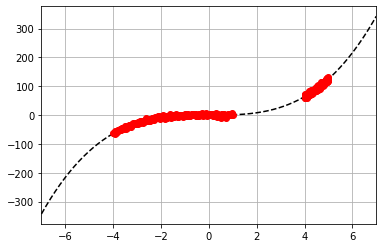

In [46]:


x, y = my_data_2_intervals((-4, 1), (4, 5), 500, train=True)

grid, fvals = my_data(-7, 7, 500, train=False)

plt.plot(grid, fvals, "k--")
plt.plot(x, y, "ro")
plt.grid()
plt.xlim(-7, 7)

plt.show()

In [47]:
y.shape

(500,)

In [48]:
model = DNGO(do_mcmc=True)
model.train(x[:, None], y, do_optimize=True)

c:\users\tdrishs\working_dir\venv\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
c:\users\tdrishs\working_dir\venv\lib\site-packages\pybnn\dngo.py:306: RuntimeWarning: invalid value encountered in log
  mll -= 0.5 * np.log(np.linalg.det(K) + 1e-10)


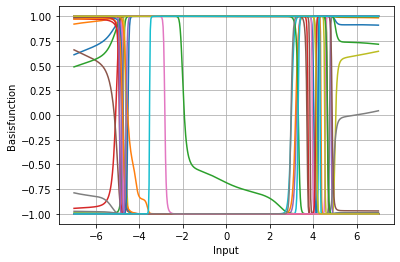

In [49]:
x_test_norm = zero_mean_unit_var_normalization(grid[:, None], model.X_mean, model.X_std)[0]

# Get basis functions from the network
basis_funcs = model.network.basis_funcs(torch.Tensor(x_test_norm)).data.numpy()

for i in range(min(50, model.n_units_3)):
    plt.plot(grid, basis_funcs[:, i])
plt.grid()
plt.xlabel("Input")
plt.ylabel("Basisfunction")
plt.show()

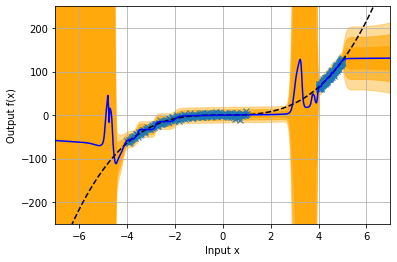

In [50]:
m, v = model.predict(grid[:, None])

plt.plot(x, y, "x")
plt.grid()
plt.plot(grid, fvals, "k--")
plt.plot(grid, m, "blue")
plt.fill_between(grid, m + np.sqrt(v), m - np.sqrt(v), color="orange", alpha=0.8)
plt.fill_between(grid, m + 2 * np.sqrt(v), m - 2 * np.sqrt(v), color="orange", alpha=0.6)
plt.fill_between(grid, m + 3 * np.sqrt(v), m - 3 * np.sqrt(v), color="orange", alpha=0.4)
plt.xlim(-7, 7)
plt.ylim(-250,250)
plt.xlabel("Input x")
plt.ylabel("Output f(x)")
plt.show()